In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def collide(xi,yi,x,y,r):
    # assumes that we only collide with at most one other obstacle
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            return True
    else: 
        return False
def computenewvelo(xi,yi,vx,vy,x,y,r):
    for xj,yj in zip(x[1:],y[1:]):        
        if (xi-xj)**2+(yi-yj)**2 < (2*r)**2:
            break        
    # collides with (xj,yj)
    v1 = np.array([vx,vy])
    v2 = np.array([0.0,0.0])
    x1 = np.array([xi,yi])
    x2 = np.array([xj,yj])
    
    v1prime = v1 - 2*(x1-x2)*np.dot(v1-v2,x1-x2)/np.dot(x1-x2,x1-x2)
    return v1prime[0],v1prime[1]

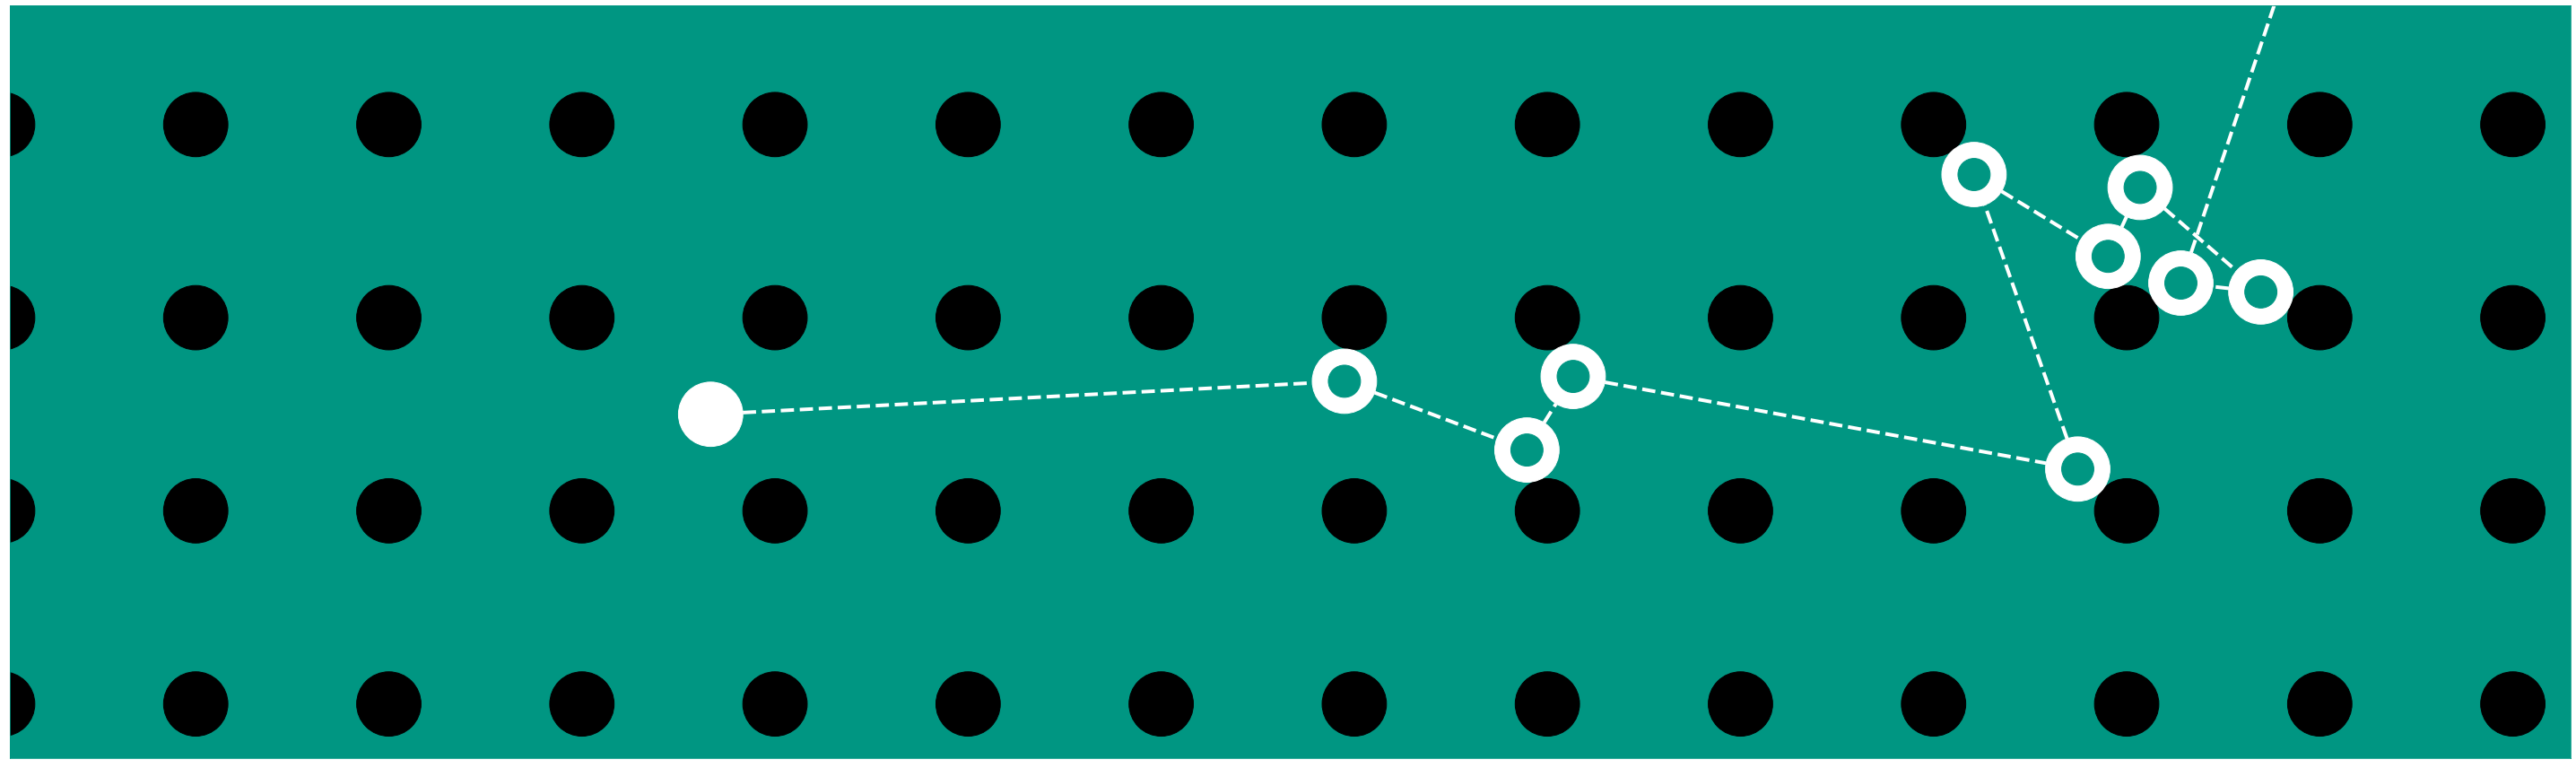

In [53]:
fig, ax = plt.subplots(figsize=(40,12)) 
ax.axis('equal')
ax.spines['bottom'].set_color((0,150/255,130/255))
ax.spines['top'].set_color((0,150/255,130/255)) 
ax.spines['right'].set_color((0,150/255,130/255))
ax.spines['left'].set_color((0,150/255,130/255))
ax.set_xlim([0,4])
ax.set_ylim([0,1.2])
ax = plt.gca()
ax.set_facecolor((0,150/255,130/255))
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_visible(False)
plt.tight_layout()




x = np.arange(0,4,0.3)
y = np.arange(0,1.2,0.3)+0.1
x,y = np.meshgrid(x,y)
x = x.flatten()
y = y.flatten()
r = 0.05
counter = 0
for xi,yi in zip(x,y):
    circle1 = plt.Circle((xi,yi), r, color="black")
    ax.add_artist(circle1)
n = len(x)



    

dt = 0.001
vx = 19.2
vy = 1
nor = np.sqrt(vx**2+vy**2)
vx /= nor
vy /= nor


xi = 1.1
yi = 0.55
lastx = xi
lasty = yi
circle1 = plt.Circle((xi,yi), r, color="white")
ax.add_artist(circle1)
for _ in range(10000):
    xi = xi + dt*vx
    yi = yi + dt*vy
    
    if not collide(xi,yi,x,y,r):
        pass
    else:
        plt.plot([lastx+r*vx,xi-r*vx],[lasty+r*vy,yi-r*vy], 'w--', lw=4)
        circle1 = plt.Circle((xi,yi), r, color="white")
        ax.add_artist(circle1)
        circle1 = plt.Circle((xi,yi), r*0.5, color=(0,150/255,130/255))
        ax.add_artist(circle1)
        lastx = xi
        lasty = yi
        vx,vy = computenewvelo(xi,yi,vx,vy,x,y,r)
    if xi<0 or xi>4 or yi<0 or yi>1.2:
        plt.plot([lastx+r*vx,xi],[lasty+r*vy,yi], 'w--', lw=4)
        break
        

plt.savefig("particlebilliardtable.png",dpi=100)

In [22]:
xi

1.9051316701949486

In [23]:
yi

0.5316227766016838